In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston

In [2]:
datasets = load_boston()
datasets_df = pd.DataFrame(datasets.data, columns=datasets.feature_names)

In [3]:
datasets_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


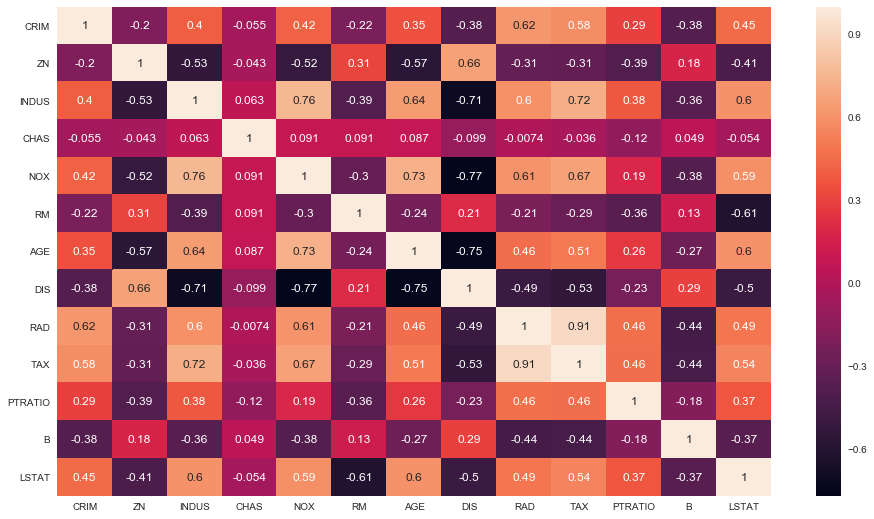

In [4]:
sns.set(rc={'figure.figsize': (16, 9)})
sns.heatmap(datasets_df.corr(), annot=True)

In [5]:
datasets_df.drop(["CHAS", "DIS", 'B', "ZN", "RM"], axis=1, inplace=True)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [7]:
X = datasets_df.loc[:,"CRIM":"LSTAT"].values
y = datasets.target

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [9]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
y_pred = model.predict(X_test)

Text(0,0.5,'Measured')

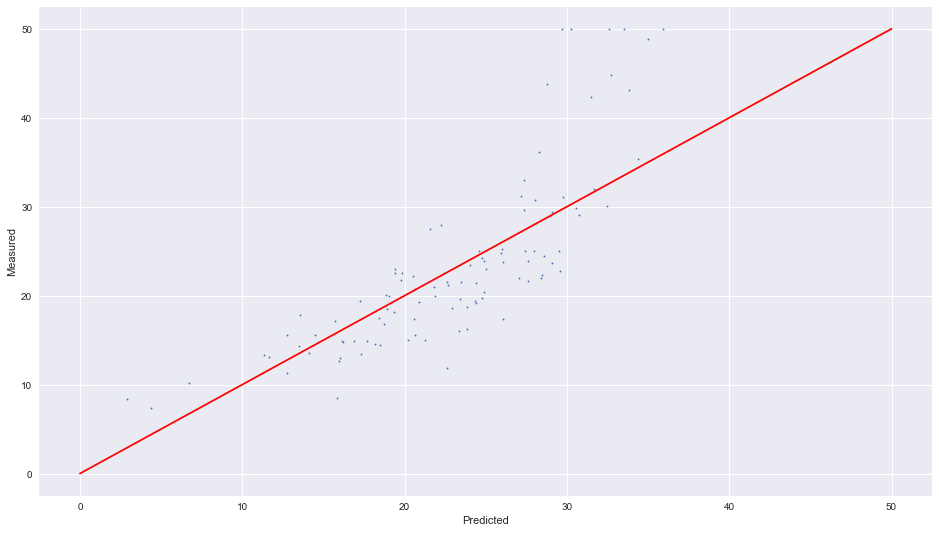

In [11]:
plt.scatter(y_pred, y_test, s=2)
plt.plot([0, 50],[0, 50], 'r')
plt.xlabel('Predicted')
plt.ylabel('Measured')